## Task 1: Implementing K-Means Clustering on Customer Segments

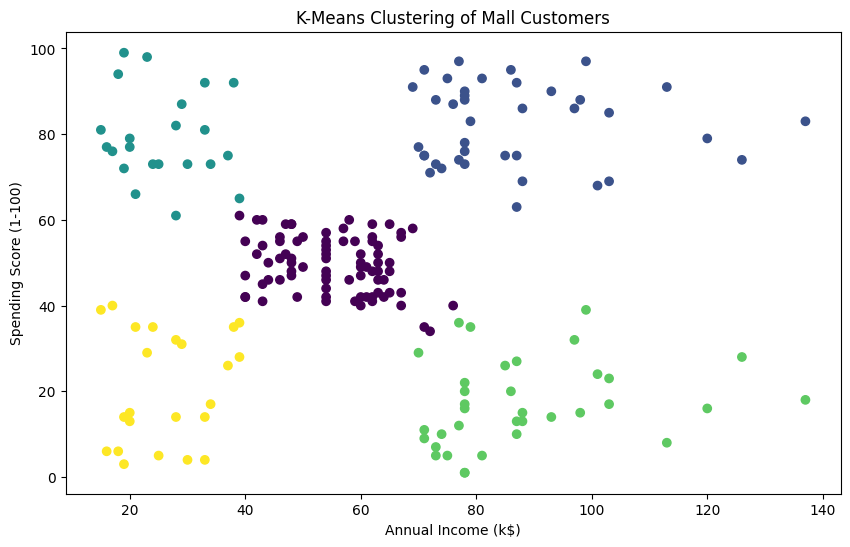

In [1]:
# Task 1: Implementing K-Means Clustering on Customer Segments

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.show()


## Task 2: Optimal Number of Clusters: Elbow Method and Silhouette Score

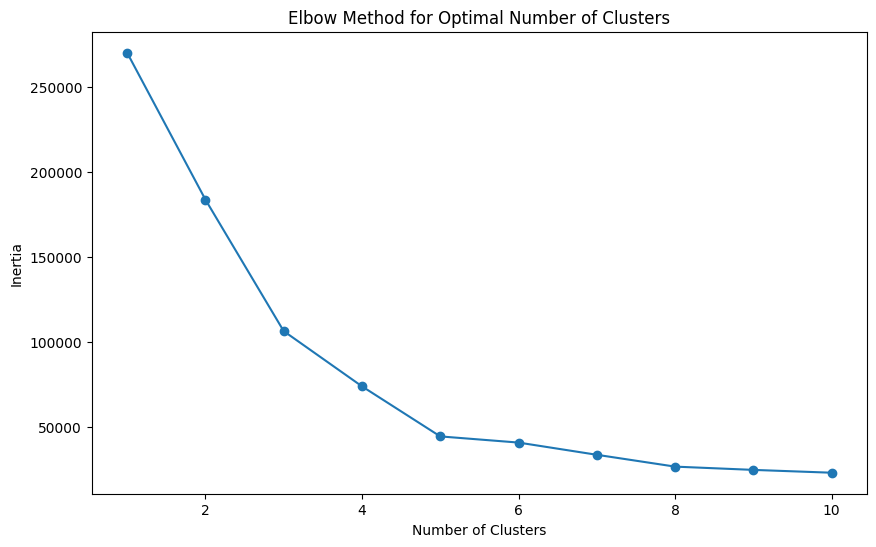

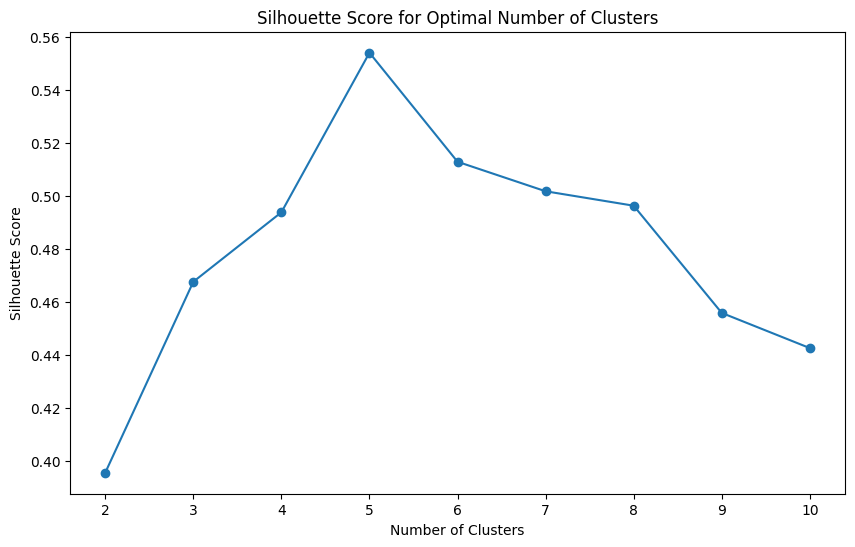

In [2]:
# Task 2: Optimal Number of Clusters: Elbow Method and Silhouette Score

from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Silhouette Score
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()


## Task 3: Cluster Profiling and Insights

In [3]:
# Task 3: Cluster Profiling and Insights

# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Describe clusters
for cluster in range(5):
    print(f"\nCluster {cluster} Profile:")
    print(data[data['Cluster'] == cluster].describe())


Cluster Centers:
[[ 56.46478873  49.77464789]
 [ 97.09090909  86.09090909]
 [ 79.          16.59259259]
 [ 23.42857143  84.78571429]
 [ 24.58333333   9.58333333]
 [ 76.96        80.8       ]
 [ 31.53333333  35.86666667]
 [109.7         22.        ]
 [ 33.5         66.25      ]
 [127.66666667  78.66666667]]

Cluster 0 Profile:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               6

## Task 4: Hierarchical Clustering for Customer Segmentation

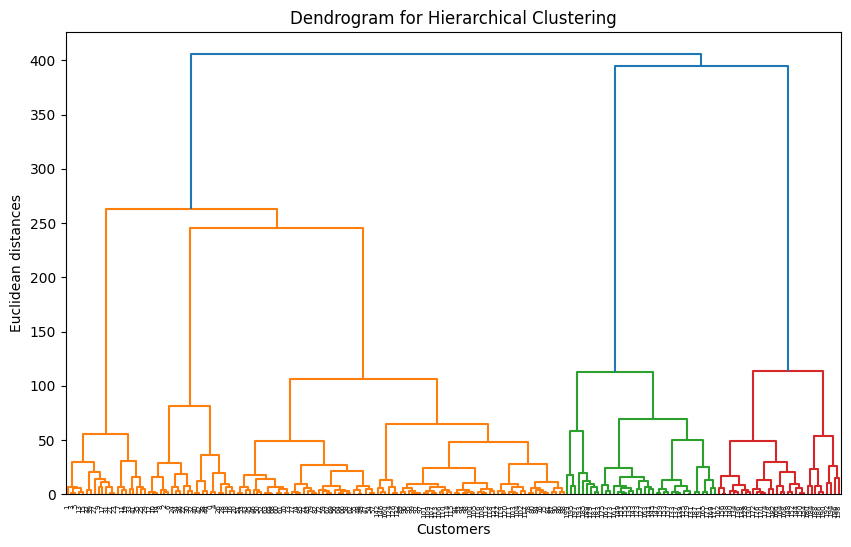

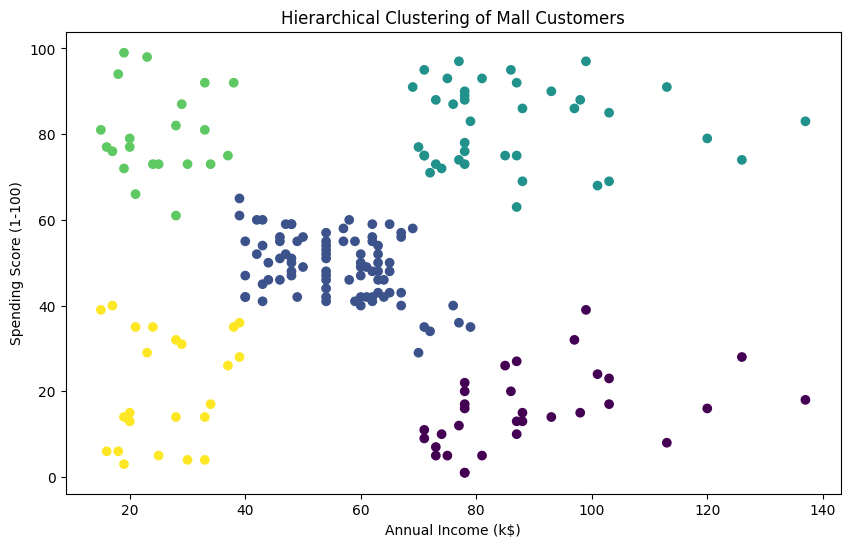

In [5]:
# Task 4: Hierarchical Clustering for Customer Segmentation

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
data['HC_Cluster'] = hc.fit_predict(X)

# Compare with K-Means
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['HC_Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering of Mall Customers')
plt.show()


## Task 5: Visualizing Clusters with PCA

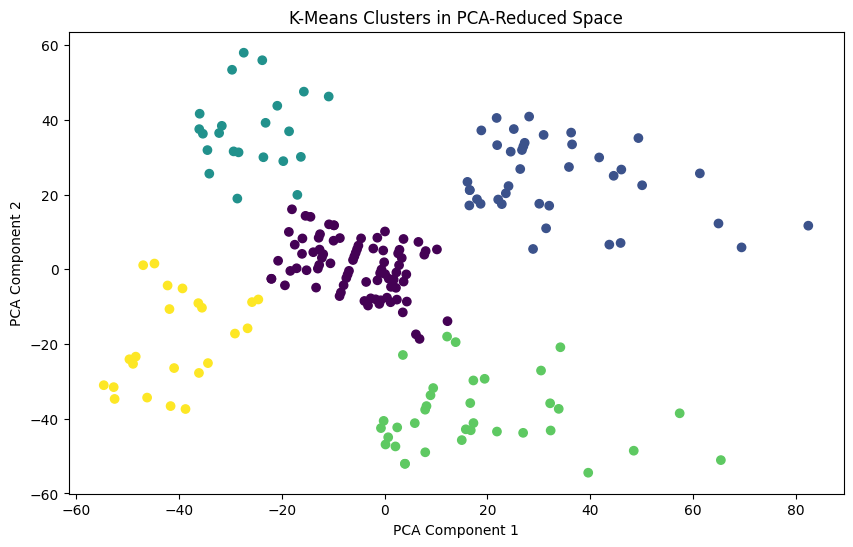

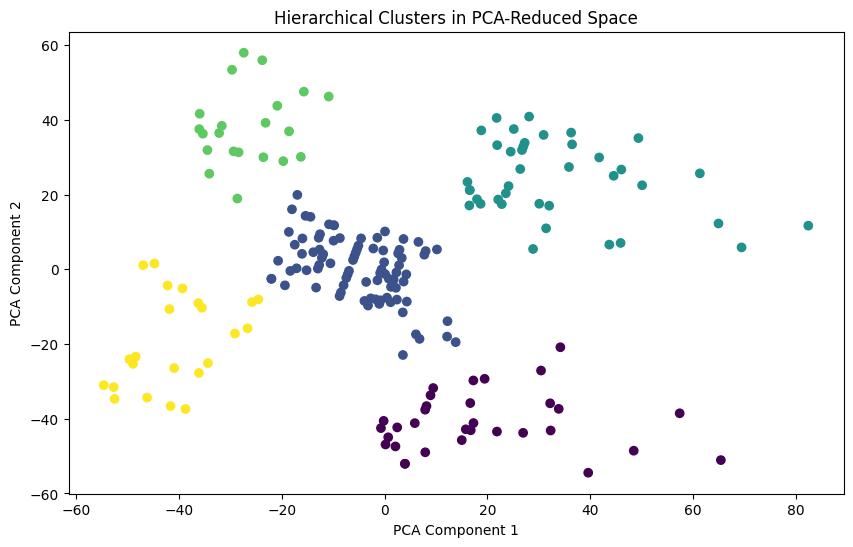

In [6]:
# Task 5: Visualizing Clusters with PCA

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize K-Means clusters in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.show()

# Visualize Hierarchical clusters in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['HC_Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clusters in PCA-Reduced Space')
plt.show()
